In [63]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
sb.set()

In [64]:
df_clean = pd.read_csv('Job_Placement_Clean.csv')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           215 non-null    int64  
 1   GENDER               215 non-null    object 
 2   SSC_PERCENTAGE       215 non-null    float64
 3   SSC_BOARD            215 non-null    object 
 4   HSC_PERCENTAGE       215 non-null    float64
 5   HSC_BOARD            215 non-null    object 
 6   HSC_SUBJECT          215 non-null    object 
 7   DEGREE_PERCENTAGE    215 non-null    float64
 8   UNDERGRAD_DEGREE     215 non-null    object 
 9   WORK_EXPERIENCE      215 non-null    object 
 10  EMP_TEST_PERCENTAGE  215 non-null    float64
 11  SPECIALISATION       215 non-null    object 
 12  MBA_PERCENTAGE       215 non-null    float64
 13  STATUS               215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


# **Exploratory Data Analysis on Numeric Variables**

The numeric variables in the dataset are as follows:
> 1. ssc_percentage : Senior secondary exams percentage (10th Grade)
> 2. hsc_percentage : Higher secondary exams percentage (12th Grade)
> 3. degree_percentage : Percentage of marks in undergrad degree
> 4. emp_test_percentage : Aptitude test percentage
> 5. mba_percent : Percentage of marks in MBA degree

We want to visualise the distributions of these variables and analyse the relationship between these variables. (if there is)

In [65]:
# Extract only numeric data variables of 'float64' data type
numeric_data = df_clean.select_dtypes(include= ['float64'])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

,SSC_PERCENTAGE,HSC_PERCENTAGE,DEGREE_PERCENTAGE,EMP_TEST_PERCENTAGE,MBA_PERCENTAGE
count,215.00,215.00,215.00,215.00,215.00
mean,67.30,66.33,66.37,72.10,62.28
std,10.83,10.90,7.36,13.28,5.83
min,40.89,37.00,50.00,50.00,51.21
25%,60.60,60.90,61.00,60.00,57.94
50%,67.00,65.00,66.00,71.00,62.00
75%,75.70,73.00,72.00,83.50,66.26
max,89.40,97.70,91.00,98.00,77.89


## Univariate distributions

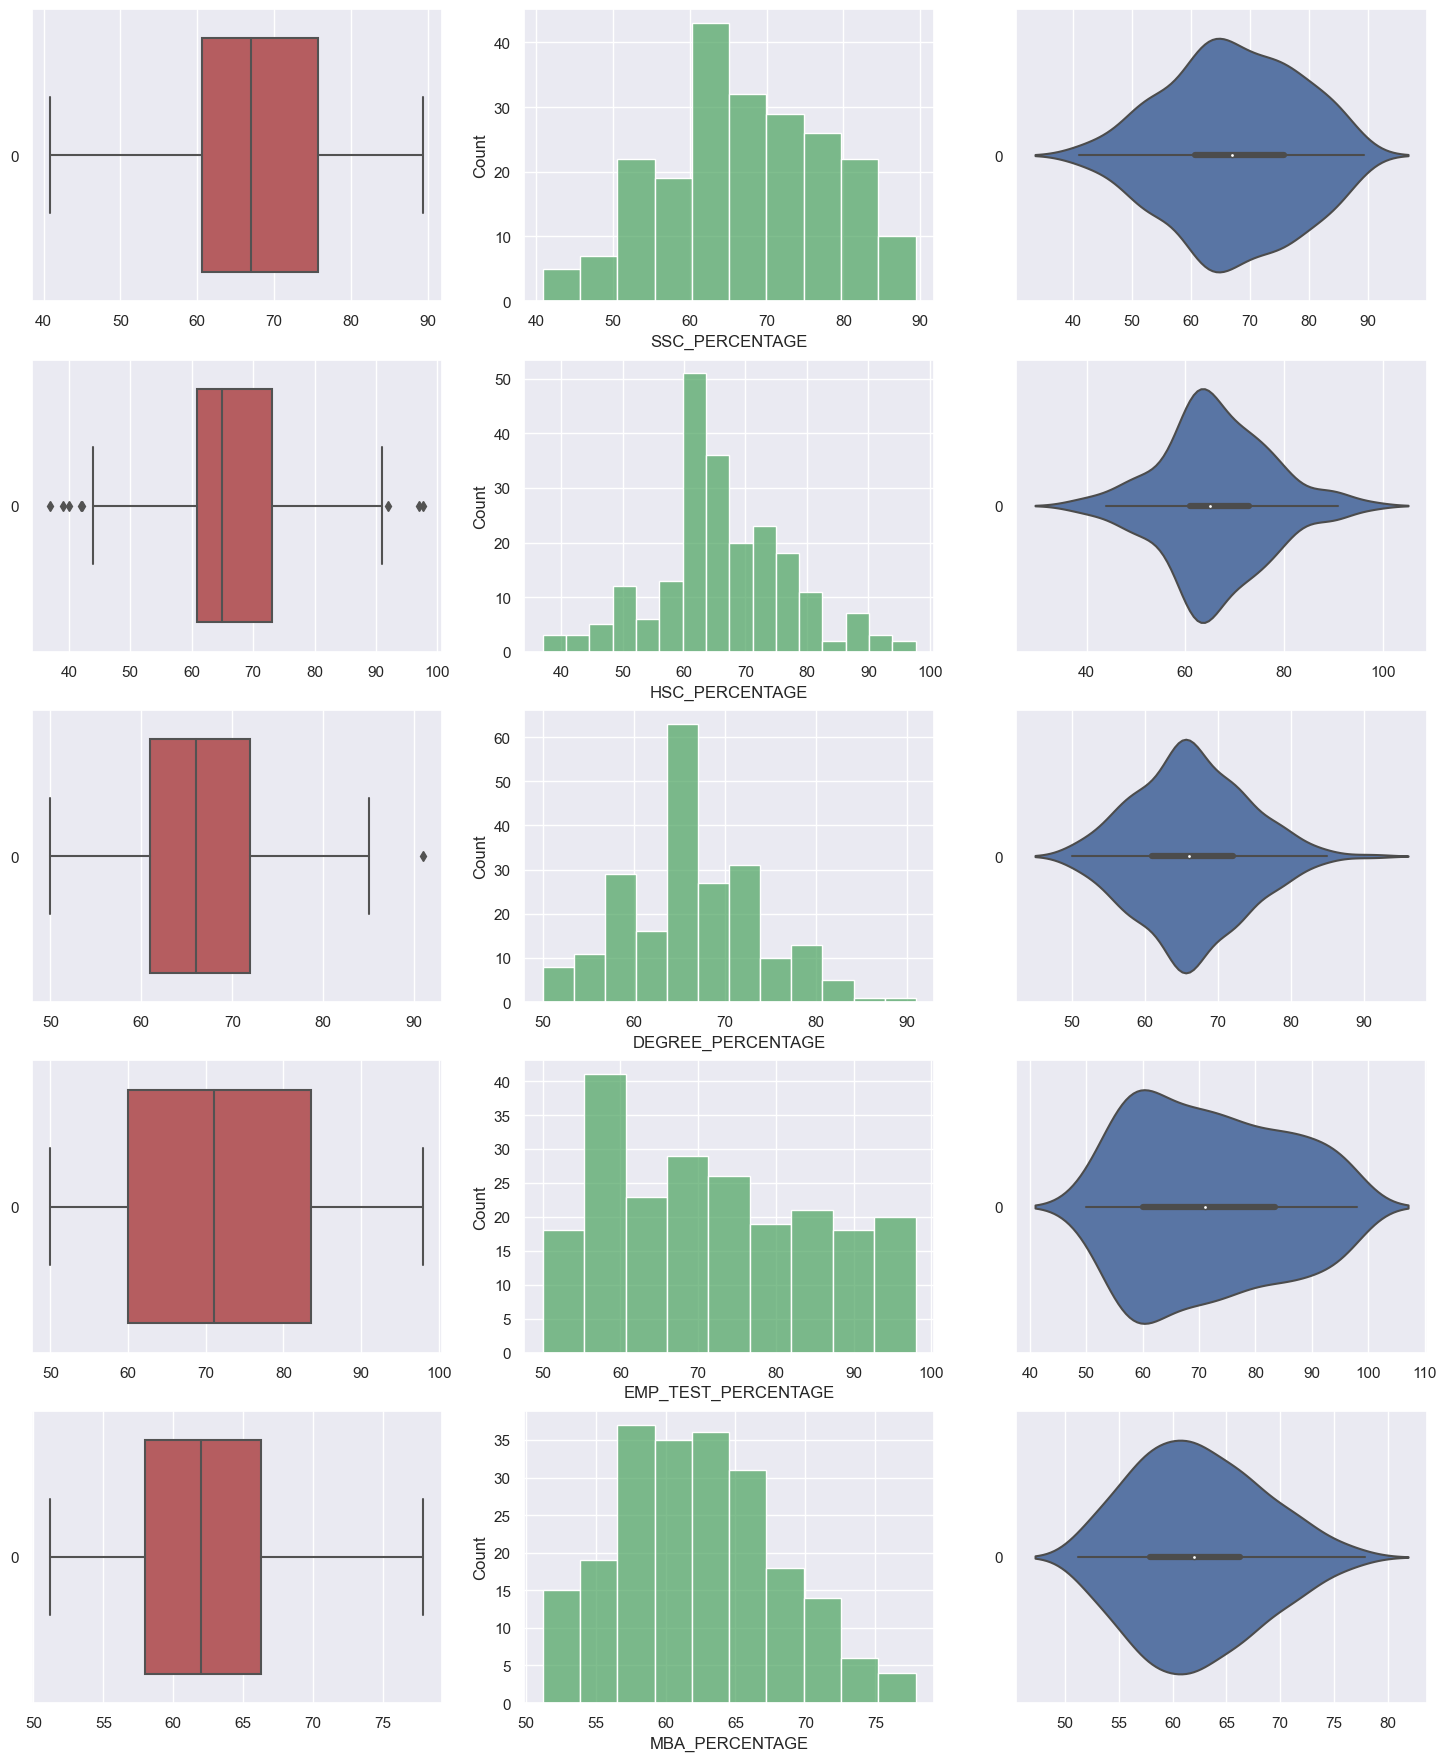

In [66]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 22))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0], color = 'r')
    sb.histplot(data = numeric_data[var], ax = axes[count,1], color = 'g')
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2], color= 'b')
    count += 1

In [67]:
# function to find number of outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [68]:
# print number of ouliers in HSC %
outliers1 = find_outliers_IQR(df_clean['HSC_PERCENTAGE'])
print("Number of outliers in HSC %: "+ str(len(outliers1)))

# print number of outliers in degree %
outliers2 = find_outliers_IQR(df_clean['DEGREE_PERCENTAGE'])
print("Number of outliers in DEGREE %: "+ str(len(outliers2)))

Number of outliers in HSC %: 8
Number of outliers in DEGREE %: 1


**We will not remove these outliers since it is very possible for students to perform exceptionally well or worse than majority of their peers in reality.**

In [69]:
# obtain the skew of the distribution

print("Skewness of Numeric Variables \n")
print("Skewness of SSC % = ",numeric_data['SSC_PERCENTAGE'].skew(axis=0))
print("\nSkewness of HSC % = ",numeric_data['HSC_PERCENTAGE'].skew(axis=0))
print("\nSkewness of Degree % = ",numeric_data['DEGREE_PERCENTAGE'].skew(axis=0))
print("\nSkewness of Aptitude % = ",numeric_data['EMP_TEST_PERCENTAGE'].skew(axis=0))
print("\nSkewness of MBA % = ",numeric_data['MBA_PERCENTAGE'].skew(axis=0))

Skewness of Numeric Variables 

Skewness of SSC % =  -0.13264949031456927

Skewness of HSC % =  0.16363913146416115

Skewness of Degree % =  0.24491716177925815

Skewness of Aptitude % =  0.28230815846982243

Skewness of MBA % =  0.31357565317840763


 **As the skewness of the univariate numeric data distribution is considerably small (range of -0.2 to 0.4), it is **not necessary to normalise the distribution in this case.**


### **Observations from univariate distributions**
> 1. Aptitude test has the highest median percentage (71%)
> 2. Aptitude test also has the highest mean percentage (72%)
> 3. MBA % has the most skewed distribution (0.314), followed by Aptitude % (0.282)


## Relationship between numeric variables

                     SSC_PERCENTAGE  HSC_PERCENTAGE  DEGREE_PERCENTAGE  \
SSC_PERCENTAGE             1.000000        0.511472           0.538404   
HSC_PERCENTAGE             0.511472        1.000000           0.434206   
DEGREE_PERCENTAGE          0.538404        0.434206           1.000000   
EMP_TEST_PERCENTAGE        0.261993        0.245113           0.224470   
MBA_PERCENTAGE             0.388478        0.354823           0.402364   

                     EMP_TEST_PERCENTAGE  MBA_PERCENTAGE  
SSC_PERCENTAGE                  0.261993        0.388478  
HSC_PERCENTAGE                  0.245113        0.354823  
DEGREE_PERCENTAGE               0.224470        0.402364  
EMP_TEST_PERCENTAGE             1.000000        0.218055  
MBA_PERCENTAGE                  0.218055        1.000000  


<AxesSubplot:>

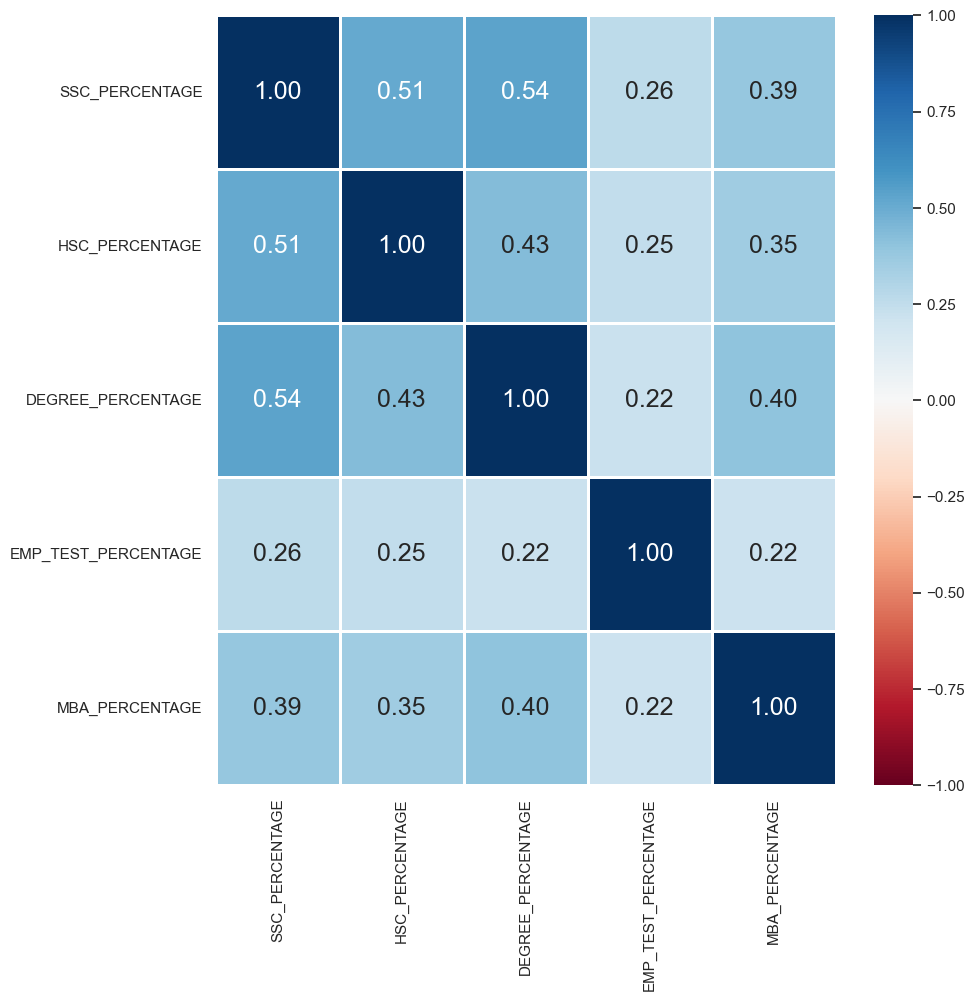

In [70]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

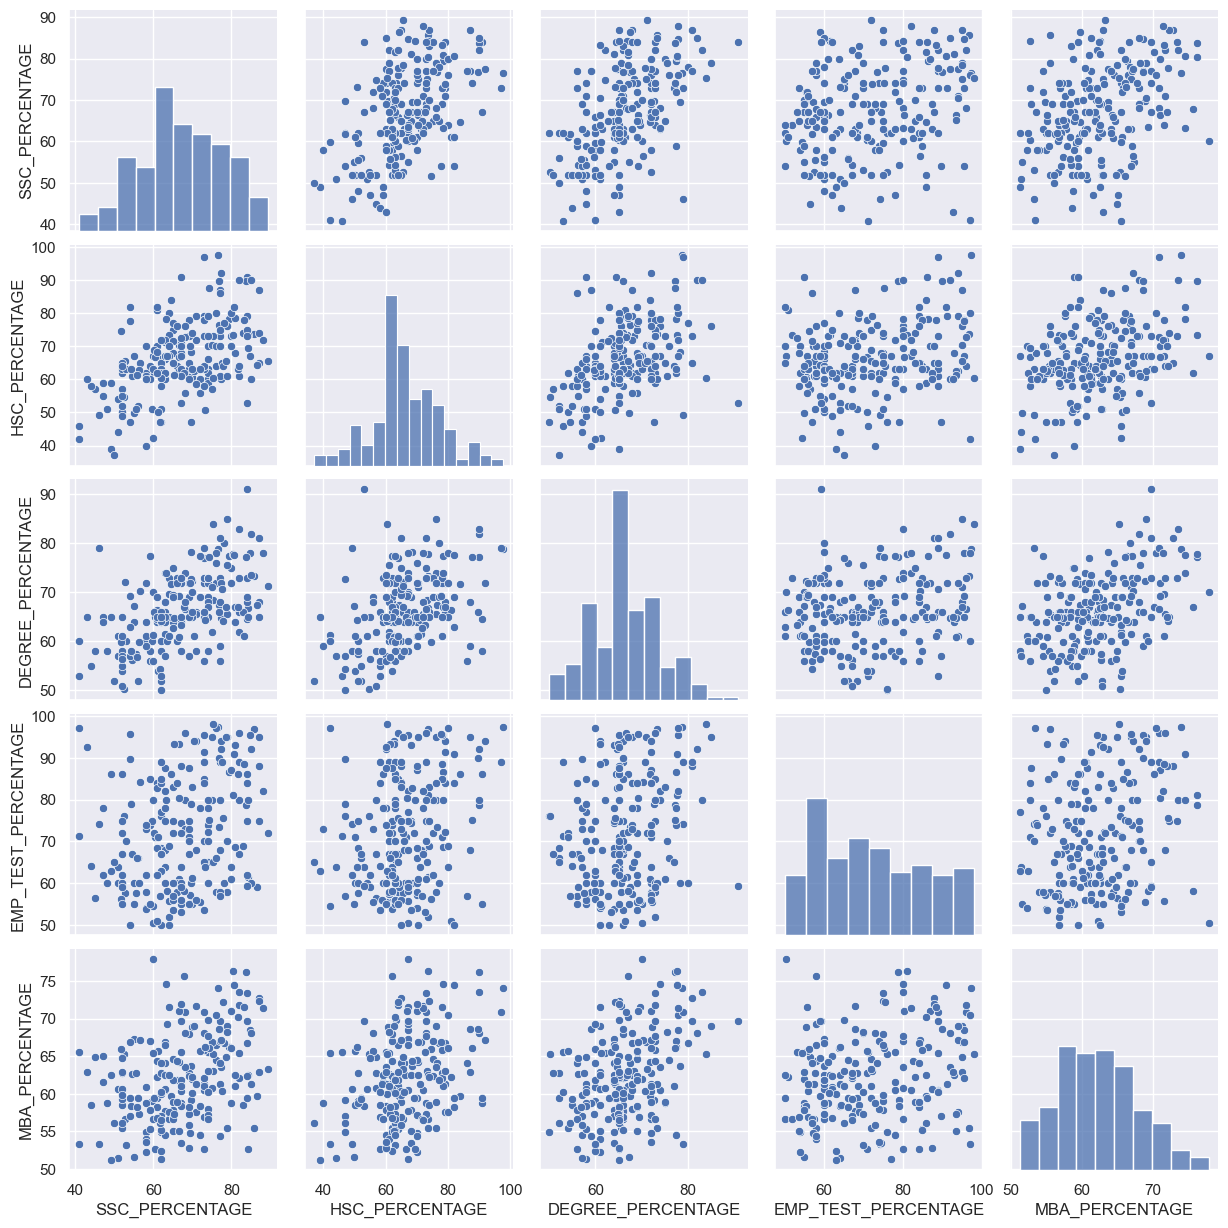

In [71]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)
plt.show()


### **Observations from the the heatmap and pairplot:**


1.   *Least* correlation between:
- Aptitude test % and degree % (0.22)
- Aptitude test % and MBA % (0.22)
2.   *Highest* correlation between degree % and ssc % (0.54)

The academic performance of an undergraduate has a **moderately strong relationship** with their performance in senior secondary level.






---
## Relationship between numeric variables and 'STATUS'

In [72]:
status = df_clean['STATUS']
numStatus = pd.concat([numeric_data, status], axis=1).reindex(status.index)
numStatus

,SSC_PERCENTAGE,HSC_PERCENTAGE,DEGREE_PERCENTAGE,EMP_TEST_PERCENTAGE,MBA_PERCENTAGE,STATUS
0,67.00,91.00,58.00,55.0,58.80,Placed
1,79.33,78.33,77.48,86.5,66.28,Placed
2,65.00,68.00,64.00,75.0,57.80,Placed
3,56.00,52.00,52.00,66.0,59.43,Not Placed
4,85.80,73.60,73.30,96.8,55.50,Placed
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed
211,58.00,60.00,72.00,74.0,53.62,Placed
212,67.00,67.00,73.00,59.0,69.72,Placed
213,74.00,66.00,58.00,70.0,60.23,Placed


<AxesSubplot:xlabel='EMP_TEST_PERCENTAGE', ylabel='STATUS'>

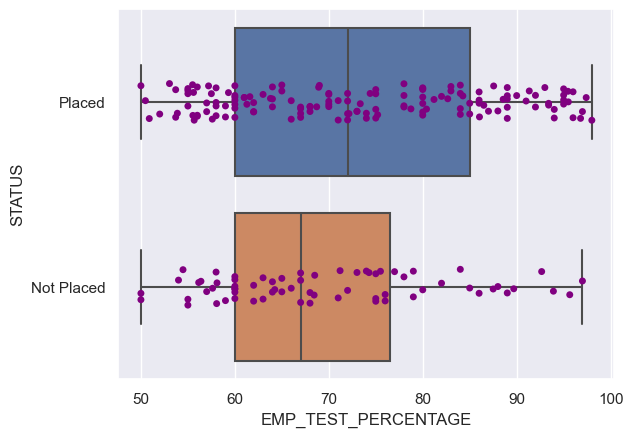

In [73]:
# Status vs Aptitude Test Percentage
sb.boxplot(x='EMP_TEST_PERCENTAGE', y='STATUS', data=numStatus)
sb.stripplot(x='EMP_TEST_PERCENTAGE', y='STATUS', data=numStatus, jitter=True, color='purple')

<AxesSubplot:xlabel='MBA_PERCENTAGE', ylabel='STATUS'>

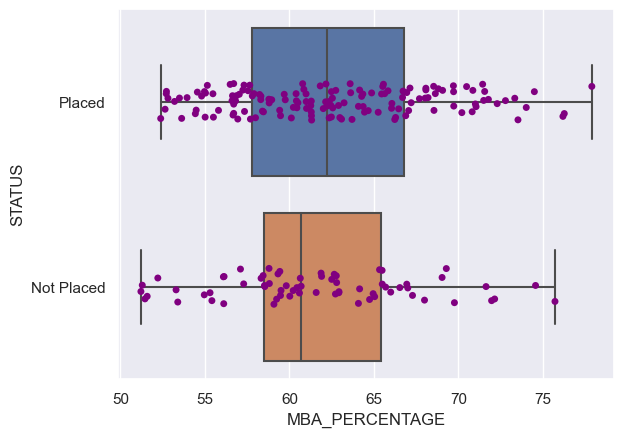

In [74]:
# Status vs MBA Percentage
sb.boxplot(x='MBA_PERCENTAGE', y='STATUS', data=numStatus)
sb.stripplot(x='MBA_PERCENTAGE', y='STATUS', data=numStatus, jitter=True, color='purple')

<AxesSubplot:xlabel='HSC_PERCENTAGE', ylabel='STATUS'>

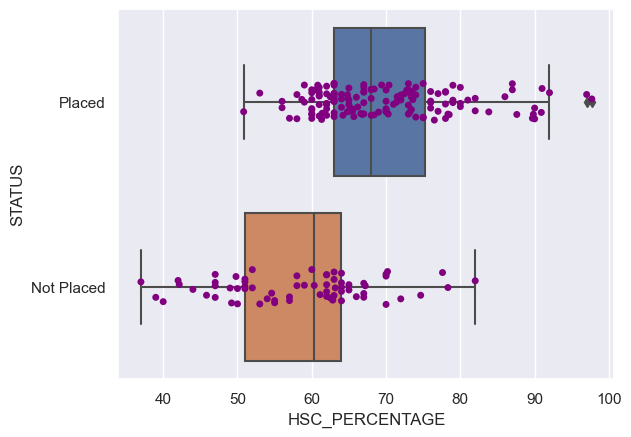

In [75]:
# Status vs HSC Percentage
sb.boxplot(x='HSC_PERCENTAGE', y='STATUS', data=numStatus)
sb.stripplot(x='HSC_PERCENTAGE', y='STATUS', data=numStatus, jitter=True, color='purple')

<AxesSubplot:xlabel='DEGREE_PERCENTAGE', ylabel='STATUS'>

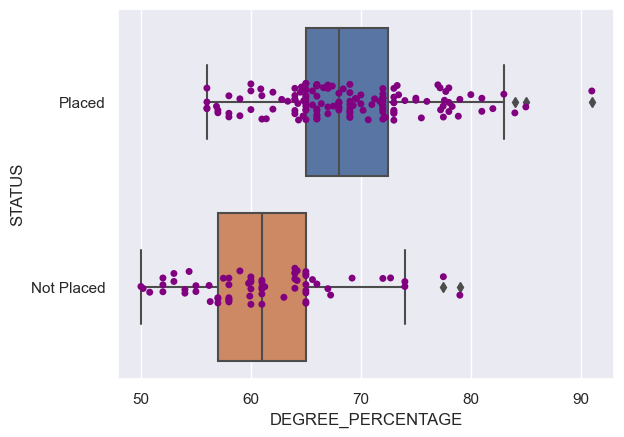

In [76]:
# Status vs Degree Percentage
sb.boxplot(x='DEGREE_PERCENTAGE', y='STATUS', data=numStatus)
sb.stripplot(x='DEGREE_PERCENTAGE', y='STATUS', data=numStatus, jitter=True, color='purple')

<AxesSubplot:xlabel='SSC_PERCENTAGE', ylabel='STATUS'>

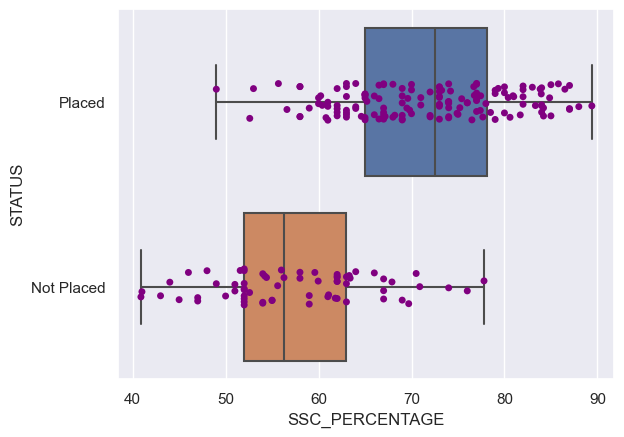

In [77]:
# Status vs SSC Percentage
sb.boxplot(x='SSC_PERCENTAGE', y='STATUS', data=numStatus)
sb.stripplot(x='SSC_PERCENTAGE', y='STATUS', data=numStatus, jitter=True, color='purple')

### **Observations from catplots:**


*   **SSC % has the strongest relationship with job placement status** because the boxplots are most distinctively different (least overlap), **followed by Degree %, HSC %**
*   Aptitude test % has the weakest relationship with job placement status because there is huge overlap between the boxplots.


---

Text(0.5, 1.0, 'Relationship between ssc %, degree % and status')

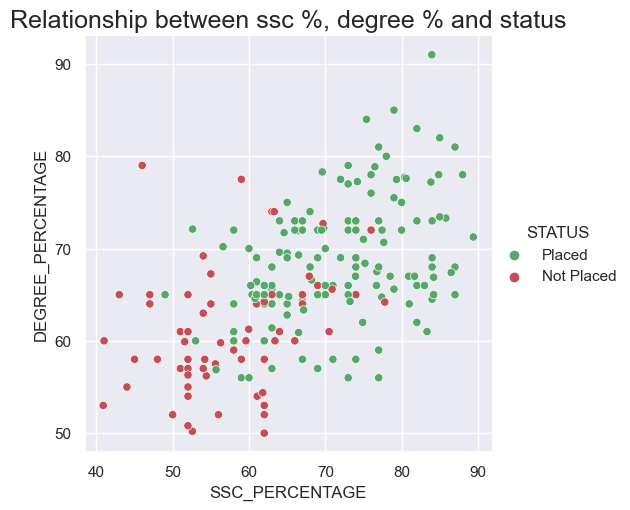

In [78]:
# Grouped scatterplot between SSC%, Degree % and Status
sb.relplot(x='SSC_PERCENTAGE',y='DEGREE_PERCENTAGE', hue='STATUS', data=numStatus, palette = ['g','r'])
plt.title('Relationship between ssc %, degree % and status',fontdict={'size': 18})

### EDA Numeric Data Conclusion:
This relationship plot **verifies that DEGREE % and SSC % are indeed the top 2 most relevant numeric features to job placement status** since there is larger proportion of 'Placed' (green markers) in the region of higher SSC % and degree %.